Subjects for this study: Buyer/Seller house.

Cons: With the data taken from the ChoTot site, their accuracy has not been verified. The data has a lot of NaN and there is a lot of noise/outlier, leading to difficult prediction and large error. Besides, the analysis of factors affecting house prices makes it difficult for the author.

Pros: The data is easy to understand, there are many references. Research objectives are close to the major you are studying.

I. IMPORT DATA

In [1]:
# import library
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from scipy import stats
sns.set()

In [2]:
# read data
df= pd.read_csv("https://raw.githubusercontent.com/hathanhtna/predict/main/rawdata.csv?token=GHSAT0AAAAAABVVOTRB43R4UAQLVU47XDI4YVUNCAA",thousands=',',skipinitialspace=True)
df.head()

,DiaChi,TinhTrangBDS,DienTich,Gia/m2,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Đã bàn giao,62 m²,"32,26 triệu/m²",2 phòng,NaN,NaN,2 phòng,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2 tỷ- 62 m2đ
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Đã bàn giao,95 m²,"55,79 triệu/m²",3 phòng,NaN,NaN,2 phòng,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,"5,3 tỷ- 95 m2đ"
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Chưa bàn giao,75 m²,"34,4 triệu/m²",2 phòng,2,5.0,2 phòng,Chung cư,Giấy tờ khác,17,NaN,Đông Nam,Đông Nam,NaN,"2,58 tỷ- 75 m2đ"
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Đã bàn giao,70 m²,"57,14 triệu/m²",1 phòng,A,7.0,1 phòng,Chung cư,Đang chờ sổ,BPA - 0712,Nội thất cao cấp,Đông Nam,Tây Bắc,NaN,4 tỷ- 70 m2đ
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Đã bàn giao,83 m²,"35,54 triệu/m²",2 phòng,NaN,NaN,2 phòng,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Tây Bắc,NaN,NaN,"2,95 tỷ- 83 m2đ"


II. CLEANING DATA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24949 entries, 0 to 24948
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            24949 non-null  object 
 1   TinhTrangBDS      24924 non-null  object 
 2   DienTich          24917 non-null  object 
 3   Gia/m2            24916 non-null  object 
 4   Phongngu          24926 non-null  object 
 5   TenPhanKhu        7035 non-null   object 
 6   SoTang            6726 non-null   float64
 7   PhongTam          24388 non-null  object 
 8   Loai              24926 non-null  object 
 9   GiayTo            18852 non-null  object 
 10  MaCanHo           3358 non-null   object 
 11  TinhTrangNoiThat  12790 non-null  object 
 12  HuongCuaChinh     9370 non-null   object 
 13  HuongBanCong      8670 non-null   object 
 14  DacDiem           5601 non-null   object 
 15  Gia               24949 non-null  object 
dtypes: float64(1), object(15)
memory usage: 

Data contains: 24949 rows, 16 columns

In [4]:
#build function clean data
def clean(n):
    n = n.split()
    if len(n) >3:
      return float(n[2]) +1
    return n[0]
def s(n):
  n = n.split()
  return n[0]

The column DienTich, Phongngu, PhongTam, Gia, we have no basis to fill them, so I choose to drop the rows that contain the value NaN or the column price is 0.
To get the right values ​​for the study, I built 2 functions to generate new columns.

In [5]:
#select data where Dientich, Phongngu, PhongTam is not NaN, SoTang
df_s = df[(df.DienTich.notnull()) & (df.Phongngu.notnull()) & (df.PhongTam.notnull()) & (df.Loai.notnull()) & (df.Gia != 0)]
df_s = df_s.reset_index()
df_s['DienTich'] = df_s['DienTich'].apply(s)
df_s['Phongngu'] = df_s['Phongngu'].apply(clean)
df_s['PhongTam'] = df_s['PhongTam'].apply(clean)
#Because column gia/m2 <=> dien tich & gia
del df_s["Gia/m2"]

We delete column Gia/m2 because it is unnesscersy in this study.

In [6]:
#clean column Price
def p(n):
  if 'GIÁ TỐT' in n:
    return n.split('\n')[0]
  return n.split('-')[0]
df_s['Gia'] = df_s['Gia'].apply(p)

def cur(n):
  if 'tỷ' in n:
    return round(float(n.split()[0].replace(',','.'))*1000000000,2)
  elif 'triệu' in n:
    return round(float(n.split()[0].replace(',','.'))*1000000,2)
df_s['Gia'] = df_s['Gia'].apply(cur)
df_s = df_s[df_s.Gia.notnull()]

Beacause Gia column has object value, so I decide to split column and nesscersary value to analyze.

In [7]:
#reset index
df_s= df_s.reset_index()
del df_s['level_0']
del df_s['index']

In [8]:
#clean column DiaChi
df_s['Quan'] = df_s['DiaChi']
for i in range(0,df_s.DiaChi.shape[0]):
    n = df_s.DiaChi[i].split(',')
    df_s['Quan'][i] = n[len(n)-2]
for i in df_s['Quan']:
    if 'Quận' not in i and 'Huyện' not in i:
        df_s = df_s.drop(df_s[df_s['Quan']==i].index)


In this house price prediction article, I will study the Quan (District) of the county to compare the difference between them. The Quan column will be extracted from the DiaChi column

In [9]:
#convert to float type
df_s.DienTich = round(df_s.DienTich.astype('float'),3)
df_s.Phongngu = df_s.Phongngu.astype('int') 
df_s.PhongTam = df_s.PhongTam.astype('int') 
df_s.Gia = df_s.Gia.astype('float') 

Convert numeric column to float or int to predict

In [10]:
df_s.describe(exclude = 'object')

,DienTich,Phongngu,SoTang,PhongTam,Gia
count,24086.000000,24086.000000,6552.000000,24086.000000,2.408600e+04
mean,232.163841,2.052230,11.347222,1.754048,2.870769e+09
std,9943.563316,0.746907,15.322589,0.612478,7.898340e+09
min,1.000000,1.000000,1.000000,1.000000,1.000000e+06
25%,56.000000,2.000000,5.000000,1.000000,1.630000e+09
50%,68.000000,2.000000,9.000000,2.000000,2.270000e+09
75%,80.000000,2.000000,16.000000,2.000000,3.300000e+09
max,1000000.000000,11.000000,720.000000,7.000000,9.800000e+11


The max value of DienTich, SoTang are unreasonable so it maybe is noise and I just filter real value to predict.

In [11]:
#deal with outlier (if use method IQR, we drop many colum, so I decide to processing data base on highest SoTang in Vietnam(81), Highest DienTich (50.000m2))
#In this study, I choose price house <10 tỷ to predict because houses's price is larger 100 tỷ is small and it affect RSME and MAE when build model. Therefore, I decide to predict house's price smaller 100 tỷ.
dt  = df_s[(df_s.DienTich > 500)|(df_s.SoTang >81)|(df_s.Gia >100000000000)]
df_s = df_s.drop(index = dt.index)

When we look at the dataset, we see that the homes costing more than 100 billion are very few, so in order not to make a big mistake in the analysis I decided to only predict the houses under 100 billion. Besides, homes over 100 billion are usually penthouses and the goal of this study is to help home sellers refer and that's just a rare number.

III. EDA DATA

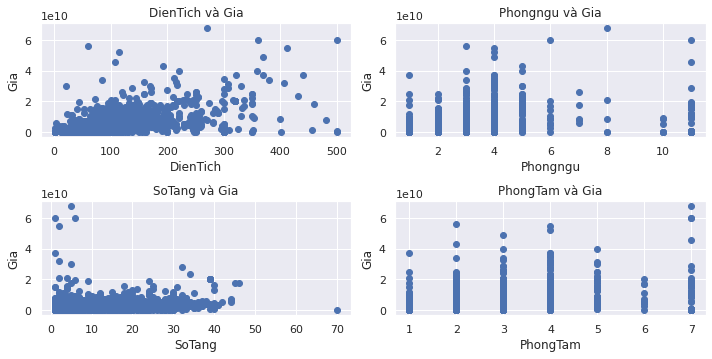

In [12]:
#eda numeric variables and target variable
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df_s[x],df_s['Gia'])
    plt.title(x + ' và Gia')
    plt.ylabel('Gia')
    plt.xlabel(x)
plt.figure(figsize=(10,12))

scatter('DienTich', 1)
scatter('Phongngu', 2)
scatter('SoTang', 3)
scatter('PhongTam', 4)

plt.tight_layout()

With DienTich and SoTang column, there are differences when the price goes up.

With Phongngu and PhongTam column, there are no difference when the price goes up.

[]

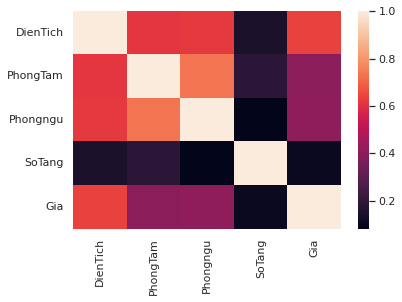

In [13]:
#corr numeric variable and target variable
df_corr = df_s[['DienTich', 'PhongTam', 'Phongngu', 'SoTang', 'Gia']]
sns.heatmap(df_corr.corr())
plt.plot()

Dientich & Gia have high correlation (0.6~0.8).

PhongTam, Phongngu & gia have correlation.

SoTang & Gia maybe uncorrelation.

In [14]:
# When unit is VN, it is difficult to read and analyze so I decide to convert into USD
df_s['USD'] = round(df_s['Gia']/24000,0)
data = df_s[['Quan','TinhTrangBDS','TenPhanKhu','Loai','GiayTo','MaCanHo','TinhTrangNoiThat','HuongCuaChinh','HuongBanCong'
                ,'DacDiem','Gia']]
bins = [40,40000,400000,40000000]


#function to analyze categorical variables
def cate(col):
    temp = df_s.copy()
    table = temp.groupby([col])['Gia'].mean()
    temp = temp.merge(table.reset_index(), how='left',on=col)
    cars_bin=['low','Medium','High']
    df_s['range'] = pd.cut(temp['USD'],bins, right=False,labels=cars_bin)
    plt.rcParams['figure.figsize'] = (18, 8)
    df = pd.DataFrame(df_s.groupby([col,'range'])['USD'].mean().unstack(fill_value=0))
    df.plot.bar()
    plt.title('House vs Price')
    plt.show()

To easily analyze price house, I decide to convert VND into USD

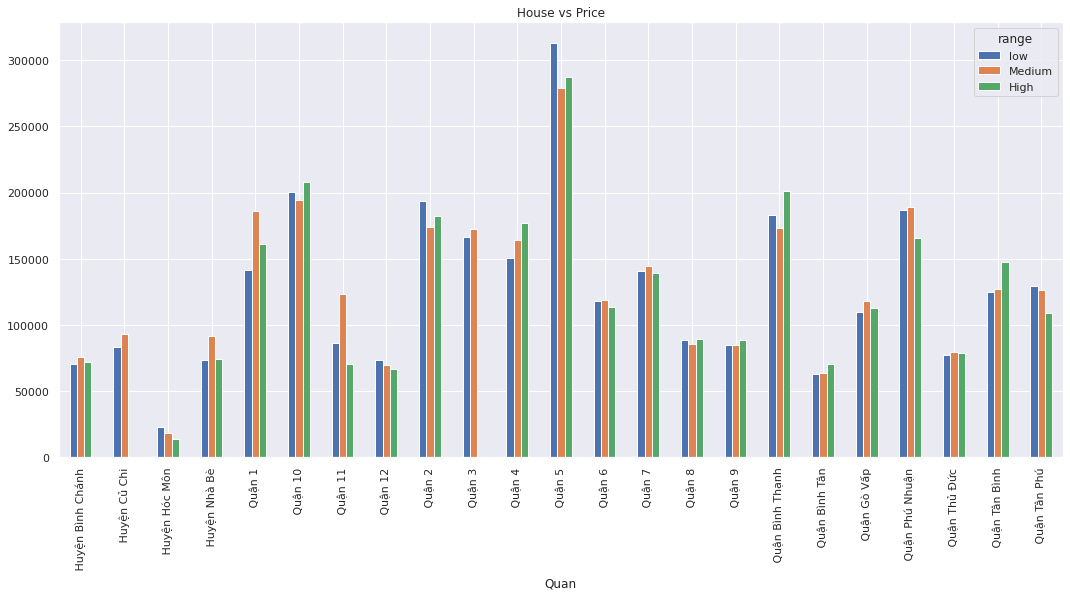

In [15]:
cate('Quan')

Quan5 has highest price and most houses is sold.
Huyện Hóc Môn has lowest price.

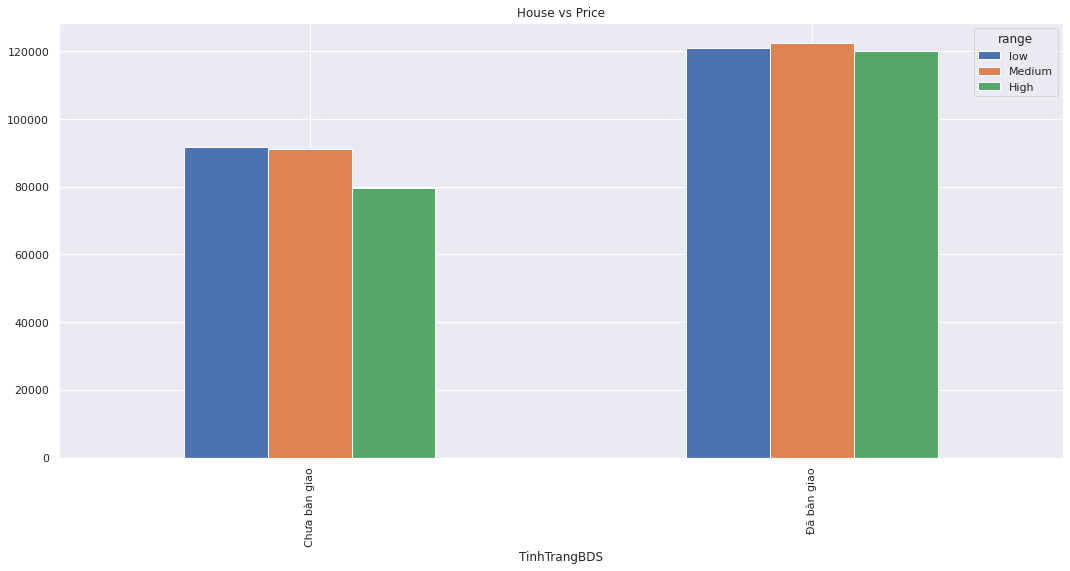

In [16]:
cate('TinhTrangBDS')

House Đã bàn Gia has higher price than Chưa bàn giao.

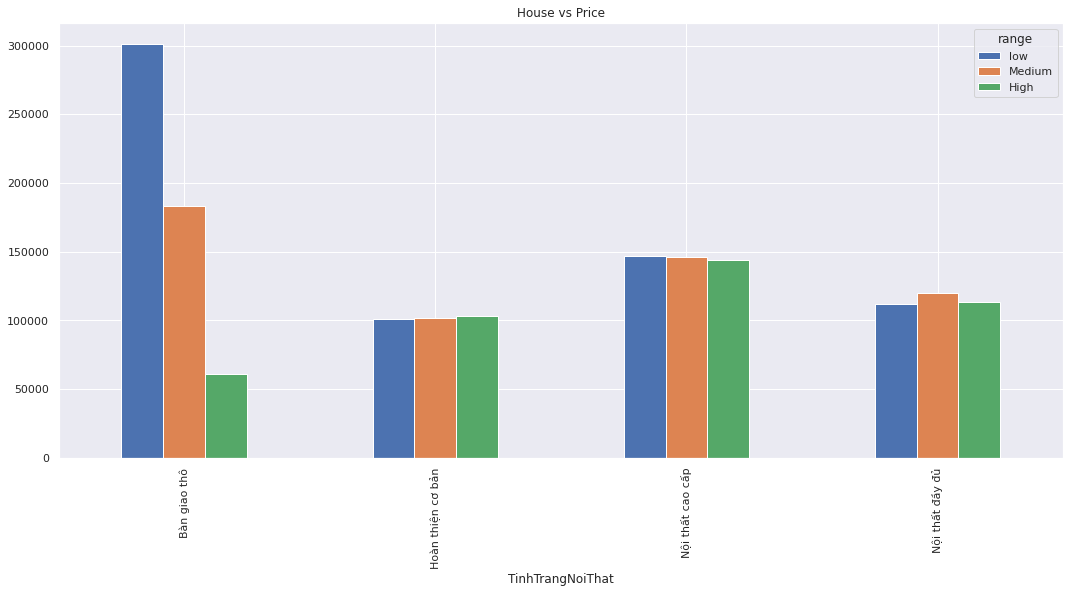

In [17]:
cate('TinhTrangNoiThat')

Bàn giao thô houses usually have low price.

Nội thấp cao cấp houses have highest price.

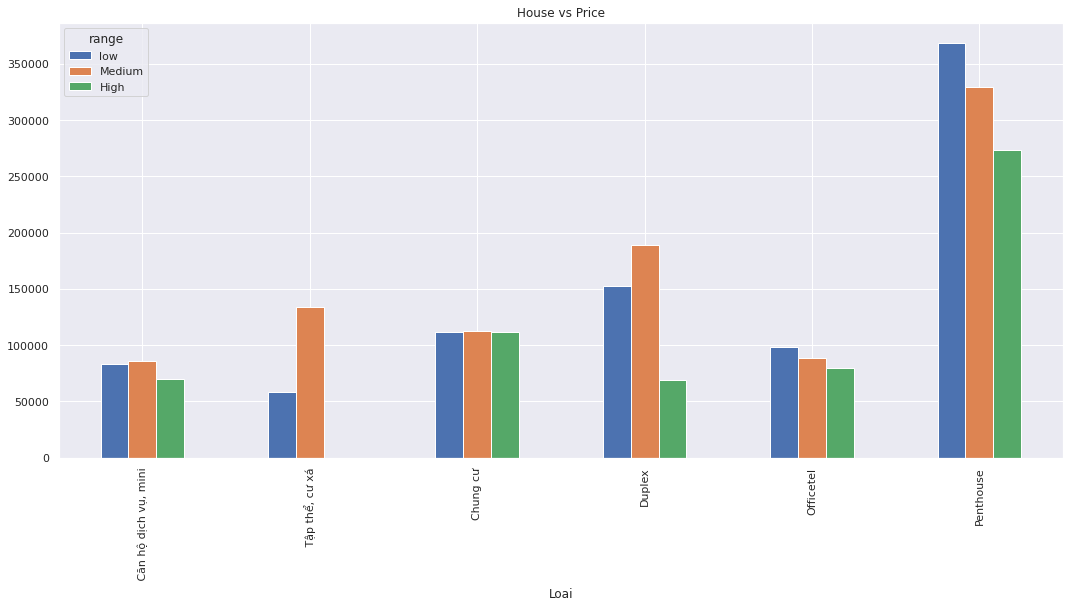

In [18]:
cate('Loai')

Tập thể, cư xá houses have lowest price & penthouse have highest price.

Đông Nam    1639
Đông         877
Tây Nam      790
Đông Bắc     732
Bắc          698
Tây          647
Tây Bắc      624
Nam          562
Name: HuongBanCong, dtype: int64


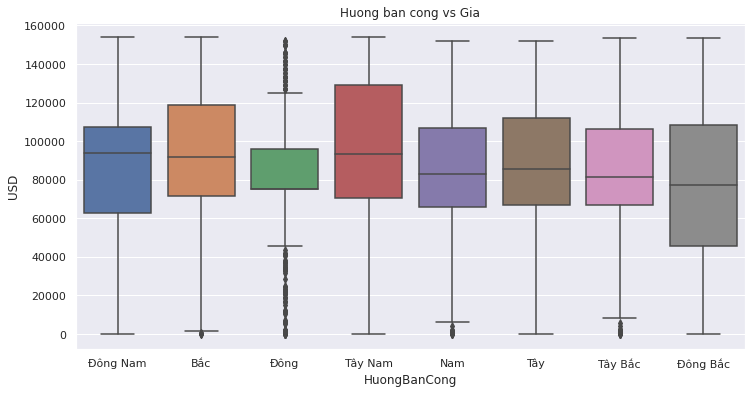

Đông Nam    1403
Tây Bắc     1270
Nam         1001
Đông Bắc     907
Đông         789
Tây Nam      630
Tây          488
Bắc          428
Name: HuongCuaChinh, dtype: int64


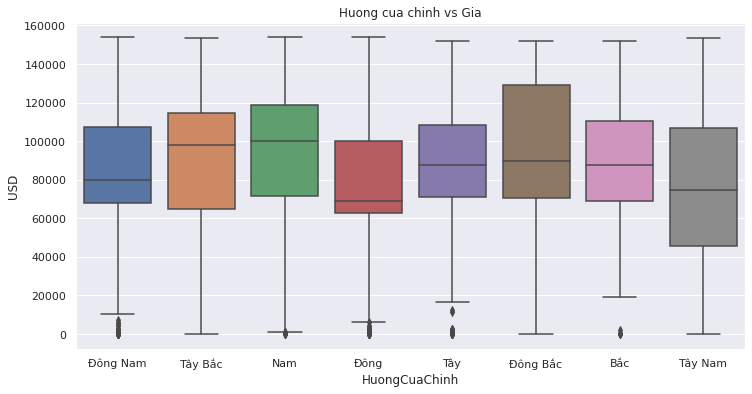

Đã có sổ        6817
Đang chờ sổ     6009
Giấy tờ khác    1545
Name: GiayTo, dtype: int64


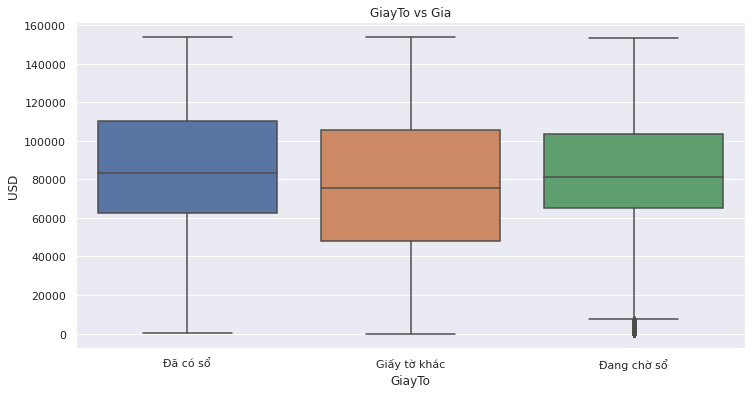

In [19]:
#remaining variables and Gia
test = df_s[df_s.USD <df_s.USD.quantile(0.8)]
plt.rcParams['figure.figsize'] = (12, 6)

print(test.HuongBanCong.value_counts())
sns.boxplot(x=test.HuongBanCong, y=test.USD)
plt.title('Huong ban cong vs Gia')
plt.show()

print(test.HuongCuaChinh.value_counts())
sns.boxplot(x=test.HuongCuaChinh, y=test.USD)
plt.title('Huong cua chinh vs Gia')
plt.show()

print(test.GiayTo.value_counts())
sns.boxplot(x=test.GiayTo, y=test.USD)
plt.title('GiayTo vs Gia')
plt.show()

In general the price is not affected by the GiayTo and the HuongBanCong. However, the HuongCuaChinh is HuongDong and the average price is lower than other prices.

IV. BUILD MODEL

In [20]:
#drop column DiaChi & columns which is NaN > 70%
df_dr = df_s.dropna(axis=1,thresh=int(df.shape[0]*0.7))
df_dr = df_dr.dropna(how='any')
df_dr = df_dr.iloc[:,1:]
#get dummy variables data
df_dummies = pd.get_dummies(df_dr.iloc[1:,:], drop_first=True)
df_dummies = df_dummies.astype(float)
cols = df_dummies.columns.values
data_preprocessed = df_dummies[cols]

To build the model, I decided to drop all columns with more than 70% of the value being NaN and column DiaChi.

Beside, I get dummies for some columns which have category value.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_preprocessed)

StandardScaler()

The idea behind StandardScaler is that it will transform data such that its distribution will have a mean value 0 and standard deviation of 1.

In [22]:
#create a Ml model for regresor.
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
X = data_preprocessed[['DienTich', 'Phongngu', 'PhongTam',
       'TinhTrangBDS_Đã bàn giao', 'Loai_ Tập thể, cư xá', 'Loai_Chung cư',
       'Loai_Duplex', 'Loai_Officetel', 'Loai_Penthouse', 'GiayTo_Đang chờ sổ',
       'GiayTo_Đã có sổ', 'Quan_ Huyện Củ Chi', 'Quan_ Huyện Hóc Môn',
       'Quan_ Huyện Nhà Bè', 'Quan_ Quận 1', 'Quan_ Quận 10', 'Quan_ Quận 11',
       'Quan_ Quận 12', 'Quan_ Quận 2', 'Quan_ Quận 3', 'Quan_ Quận 4',
       'Quan_ Quận 5', 'Quan_ Quận 6', 'Quan_ Quận 7', 'Quan_ Quận 8',
       'Quan_ Quận 9', 'Quan_ Quận Bình Thạnh', 'Quan_ Quận Bình Tân',
       'Quan_ Quận Gò Vấp', 'Quan_ Quận Phú Nhuận', 'Quan_ Quận Thủ Đức',
       'Quan_ Quận Tân Bình', 'Quan_ Quận Tân Phú']]
y = data_preprocessed['Gia']

In this study, I build Linear, Decision, Random Regression to predict price house.

In [24]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
#build model linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Evaluating the Algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 863201531.6319046
Mean Squared Error: 3.236356394135806e+18
Root Mean Squared Error: 1798987602.5520036


In [26]:
#build model decisiontree
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)
y_pred = regressor.predict(X_test)

# Evaluating the Algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', )

Mean Absolute Error: 210020923.2588204
Mean Squared Error: 4.825980355956848e+17
Root Mean Squared Error: 694692763.4542372
R-squared:


In [27]:
#build model random forest
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)
y_pred = regressor.predict(X_test)

# Evaluating the Algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 323022776.1834989
Mean Squared Error: 8.094195435150674e+17
Root Mean Squared Error: 899677466.3817402


The best model to predict is Decision Tree Regression (base on RMSE)